1. Introducción
-Breve presentación del problema o pregunta de investigación.
Cual es la distribución del rescate de peces en los cuatro tramos del río Sogamoso producto de la operación de la central hidroelectrica

-Contexto: ¿por qué es relevante este problema?
Las centrales hidrolectricas generan un fenomeno denominado hydropeaking o variación rapida del caudal, lo cual afecta a los peces y puede dejarlos varados en las orillas cuando disminuye el caudal

2. Descripción de la base de datos

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Base de datos.xlsx to Base de datos.xlsx


In [4]:
# Visualizar una pequeña muestra de los datos
import pandas as pd
path = 'Base de datos.xlsx'
pd.read_excel(path)

,Nombre_especie,Mes_medicion,Año_medicion,Tramo_medicion,Conteo_individuos
0,Golosa,ENE,2021,1,2790
1,Golosa,FEB,2021,1,2677
2,Golosa,MAR,2021,1,5588
3,Golosa,ABR,2021,1,7166
4,Golosa,MAY,2021,1,828
...,...,...,...,...,...
283,Bocachico,AGO,2021,4,0
284,Bocachico,SEP,2021,4,0
285,Bocachico,OCT,2021,4,0
286,Bocachico,NOV,2021,4,7


In [5]:
df=pd.read_excel(path)

In [6]:
# Número de registros y variables
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

Número de registros: 288
Número de variables: 5


In [7]:
# Tipos de datos
print("\nTipos de datos por variable:")
print(df.dtypes.value_counts())


Tipos de datos por variable:
int64     3
object    2
Name: count, dtype: int64


In [8]:
# Clasificación de variables
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🔹 Variables categóricas:")
print("\n".join([f"- {col}" for col in categoricas]))

print("\n🔸 Variables numéricas:")
print("\n".join([f"- {col}" for col in numericas]))

🔹 Variables categóricas:
- Nombre_especie
- Mes_medicion

🔸 Variables numéricas:
- Año_medicion
- Tramo_medicion
- Conteo_individuos


In [9]:
# Descripción general
print("\nDescripción de variables numéricas:")
print(df.describe())


Descripción de variables numéricas:
       Año_medicion  Tramo_medicion  Conteo_individuos
count         288.0       288.00000         288.000000
mean         2021.0         2.50000         259.659722
std             0.0         1.11998         777.772735
min          2021.0         1.00000           0.000000
25%          2021.0         1.75000           0.000000
50%          2021.0         2.50000          18.000000
75%          2021.0         3.25000         178.250000
max          2021.0         4.00000        7166.000000


3. Análisis inicial de las variables

In [10]:
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = df.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])  # Solo muestra variables con al menos un valor faltante


Conteo de valores faltantes por variable:
Series([], dtype: int64)


In [11]:
# Conteo de valores únicos por variable
print("\nConteo de valores únicos por variable:")
print(df.nunique().sort_values(ascending=False))


Conteo de valores únicos por variable:
Conteo_individuos    145
Nombre_especie        15
Mes_medicion          12
Tramo_medicion         4
Año_medicion           1
dtype: int64


In [12]:
# Variables más importantes (yo hice selección manual)
variables_clave = ['Nombre_especie', 'Mes_medicion', 'Año_medicion', 'Tramo_medicion', 'Conteo_individuos']
print("\nVista rápida de variables clave:")
print(df[variables_clave].head())
# Vista rápida de las variables clave
print("\nEstadísticas descriptivas de variables clave:")
print(df[variables_clave].describe())
# Vista rápida de las variables clave
print("\nEstadísticas descriptivas de variables clave:")
print(df[variables_clave].describe())


Vista rápida de variables clave:
  Nombre_especie Mes_medicion  Año_medicion  Tramo_medicion  Conteo_individuos
0         Golosa          ENE          2021               1               2790
1         Golosa          FEB          2021               1               2677
2         Golosa          MAR          2021               1               5588
3         Golosa          ABR          2021               1               7166
4         Golosa          MAY          2021               1                828

Estadísticas descriptivas de variables clave:
       Año_medicion  Tramo_medicion  Conteo_individuos
count         288.0       288.00000         288.000000
mean         2021.0         2.50000         259.659722
std             0.0         1.11998         777.772735
min          2021.0         1.00000           0.000000
25%          2021.0         1.75000           0.000000
50%          2021.0         2.50000          18.000000
75%          2021.0         3.25000         178.250000
max  

4. Visualizaciones exploratorias básicas

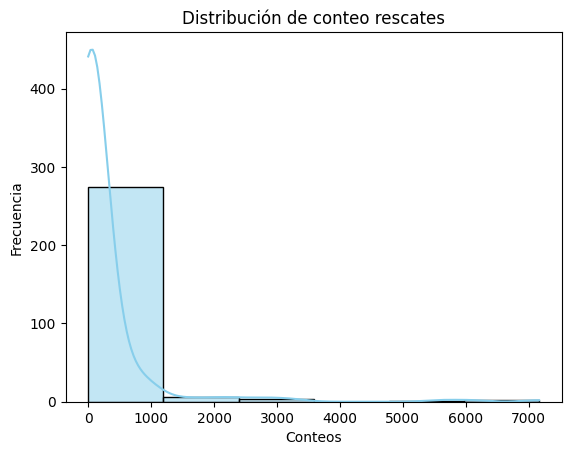

In [13]:
# Histograma: distribución de edad
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Conteo_individuos'], bins=6, kde=True, color='skyblue')
plt.title("Distribución de conteo rescates")
plt.xlabel("Conteos")
plt.ylabel("Frecuencia")
plt.show()

/tmp/ipython-input-3228368867.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tramo_medicion", y="Conteo_individuos", data=df_sum, palette="viridis")


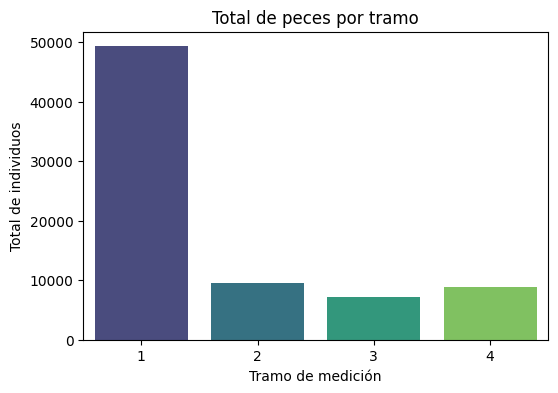

In [15]:
# Gráfico de barras: conteo por tramos
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por tramo y sumar los conteos
df_sum = df.groupby("Tramo_medicion", as_index=False)["Conteo_individuos"].sum()

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x="Tramo_medicion", y="Conteo_individuos", data=df_sum, palette="viridis")

# Etiquetas y título
plt.xlabel("Tramo de medición")
plt.ylabel("Total de individuos")
plt.title("Total de peces por tramo")

# Mostrar gráfico
plt.show()



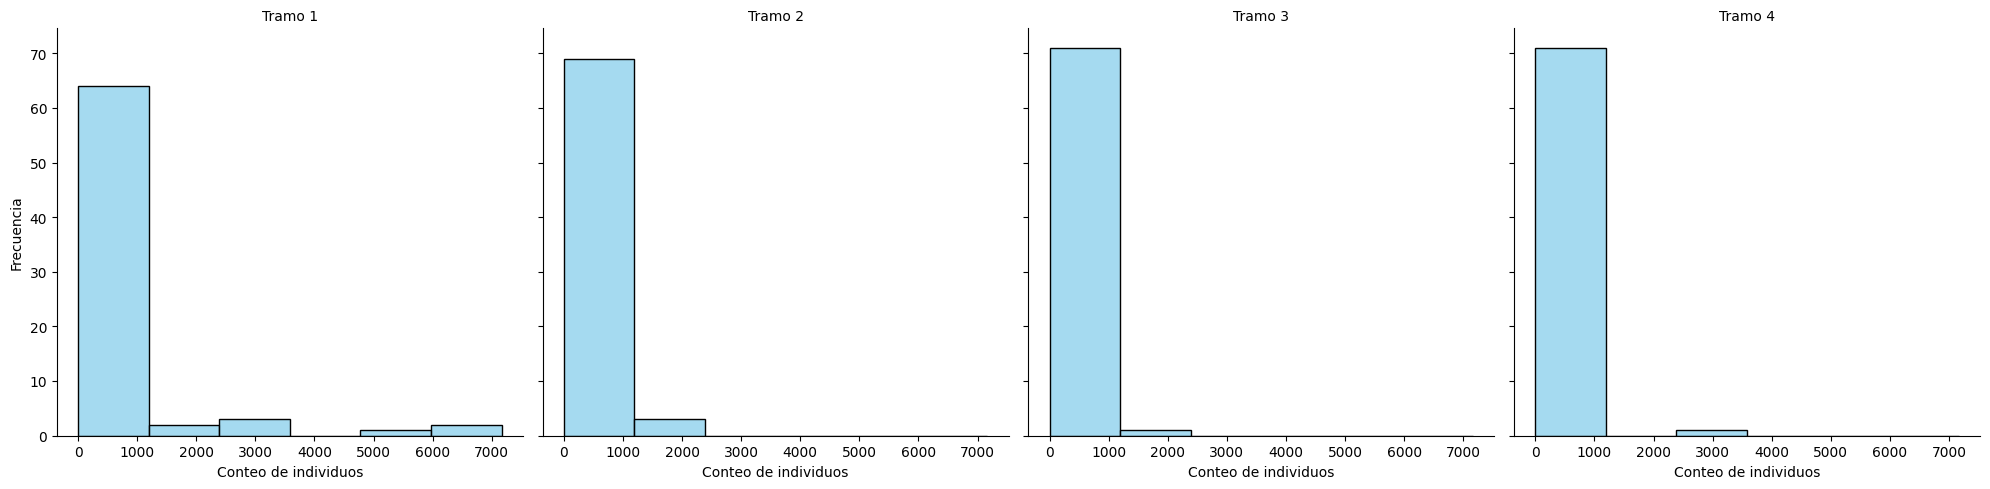

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de Conteo_individuos por cada tramo
g = sns.displot(
    data=df,
    x="Conteo_individuos",
    col="Tramo_medicion",   # un histograma por tramo
    bins=6,                # número de intervalos (ajústalo según tus datos)
    color="skyblue",
    kde=False               # si quieres curva de densidad pon True
)

# Etiquetas generales
g.set_axis_labels("Conteo de individuos", "Frecuencia")
g.set_titles("Tramo {col_name}")

plt.show()


/tmp/ipython-input-1002543862.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Tramo_medicion", y="Conteo_individuos", data=df, palette="viridis")


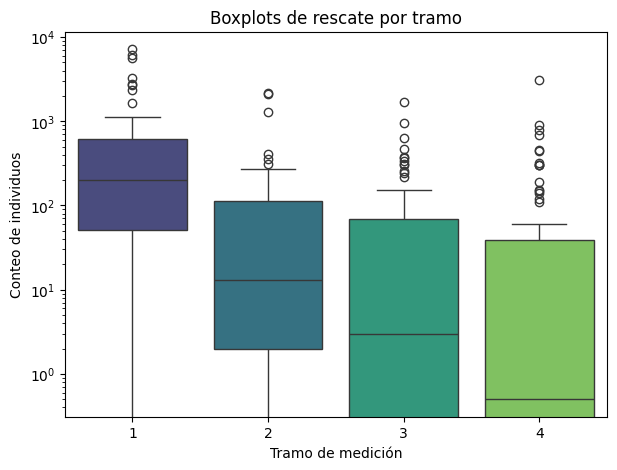

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.boxplot(x="Tramo_medicion", y="Conteo_individuos", data=df, palette="viridis")

# Etiquetas y título
plt.xlabel("Tramo de medición")
plt.ylabel("Conteo de individuos")
plt.title("Boxplots de rescate por tramo")
plt.yscale("log")
plt.show()

5. Interpretaciones iniciales